In [1]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import cv2
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms
from icecream import ic
from itertools import repeat
# import sympy as sy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# spacy

In [3]:
!pip install spacy

Looking in indexes: http://pypi.douban.com/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 7.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.1/128.1 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 KB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.6/452.6 KB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 11.8 MB/s eta 0:00:00
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [16]:
!which python

/opt/conda/bin/python


In [17]:
!python -m spacy download en_core_web_sm # en_core_web_sm

Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/urllib3/connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "/opt/conda/lib/python3.9/site-packages/urllib3/util/connection.py", line 96, in create_connection
    raise err
  File "/opt/conda/lib/python3.9/site-packages/urllib3/util/connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 110] Connection timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "/opt/conda/lib/python3.9/site

In [4]:
import spacy
from sklearn.decomposition import PCA

In [15]:
nlp = spacy.load('en')

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [7]:
# spacy.load?

# T-SNE

In [18]:
from sklearn.manifold import TSNE

In [19]:
x = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
x

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [20]:
x_embedded = TSNE(n_components=2).fit_transform(x)

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [22]:
x_embedded, x_embedded.shape

(array([[  95.39586 ,  259.84665 ],
        [ 181.88231 ,   56.724937],
        [ -21.241238,  -29.757149],
        [-107.72761 ,  173.36453 ]], dtype=float32),
 (4, 2))

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [28]:
from sklearn.datasets import fetch_mldata

ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (/opt/conda/lib/python3.9/site-packages/sklearn/datasets/__init__.py)

In [29]:
# from tensorflow.keras.datasets import mnist

In [32]:
import tensorflow as tf

In [33]:
mnist = tf.keras.datasets.mnist

In [36]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

In [43]:
x, y = training_images.reshape(training_images.shape[0], -1), training_labels
x.shape, y.shape

((60000, 784), (60000,))

In [45]:
feat_cols = [f'pixel{i}' for i in range(x.shape[1])]
feat_cols

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

In [44]:
import pandas as pd

In [48]:
df = pd.DataFrame(x, columns=feat_cols)
df['y'] = y
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [50]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

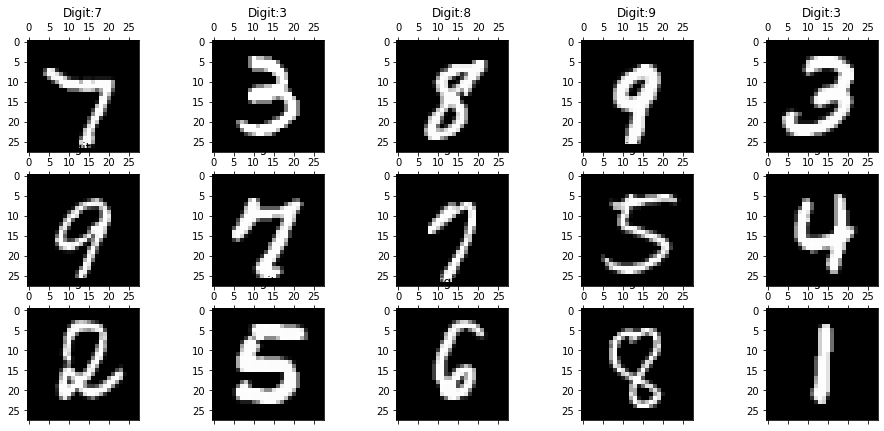

In [66]:
plt.gray()
fig = plt.figure(figsize=(16,7))
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1, title=f"Digit:{df.loc[rndperm[i], 'y']}")
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape(28,28).astype(float))

In [60]:
i = 1
df.loc[rndperm[i], 'y']

3

## pca

In [67]:
pca = PCA(n_components=3)


In [70]:
pca_result = pca.fit_transform(df[feat_cols].values)

In [71]:
a = df[feat_cols].values
a.shape

(60000, 784)

In [74]:
pca_result.shape

(60000, 3)

In [72]:
df1 = df.copy()

In [75]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

In [77]:
print(f"Explained variation per principal component:{pca.explained_variance_ratio_}")

Explained variation per principal component:[0.09704664 0.07095924 0.06169089]


<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

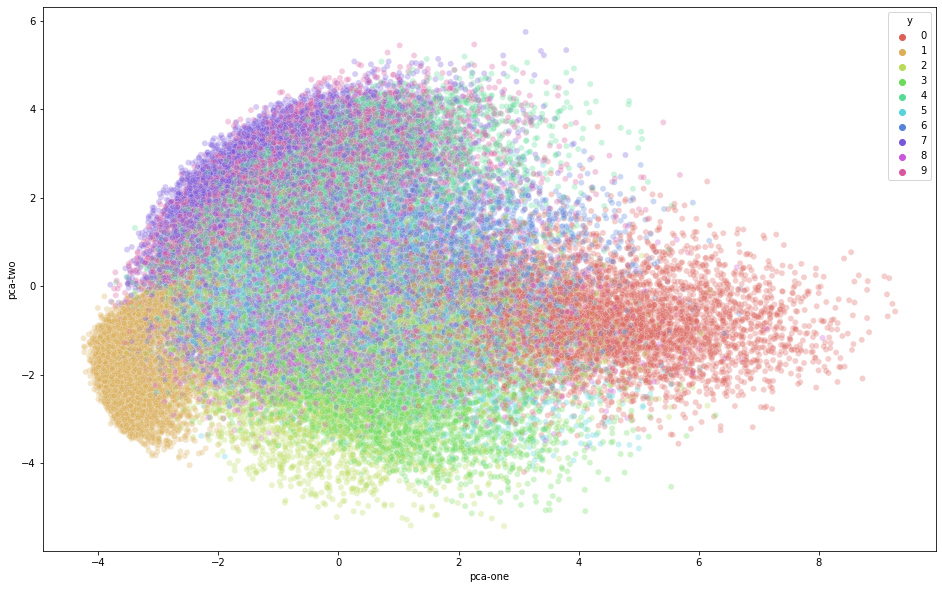

In [80]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', 
    y='pca-two', 
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm, :],
    legend="full",
    alpha=0.3
)

/tmp/ipykernel_61797/1670816478.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


Text(0.5, 0, 'pca-one')

Text(0.5, 0.5, 'pca-two')

Text(0.5, 0, 'pca-three')

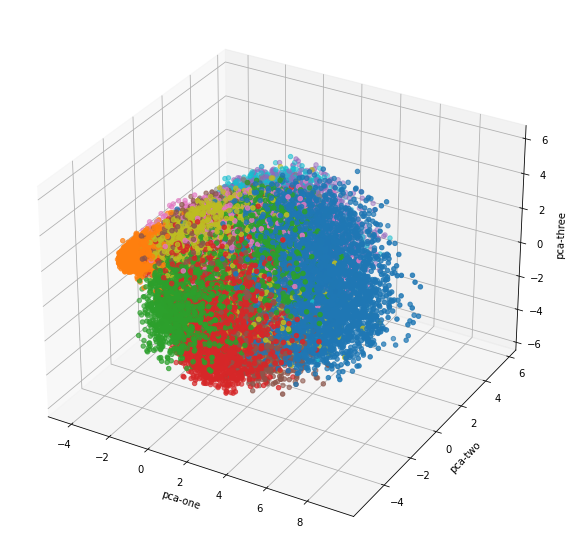

In [83]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]['pca-one'],
    ys=df.loc[rndperm,:]['pca-two'],
    zs=df.loc[rndperm,:]['pca-three'],
    c=df.loc[rndperm,:]['y'],
    cmap='tab10'
)
ax.set_xlabel("pca-one")
ax.set_ylabel("pca-two")
ax.set_zlabel("pca-three")

## TSNE

In [86]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
data_subset.shape

(10000, 784)

In [85]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [90]:
time_start = time.time()
tsne_result = tsne.fit_transform(data_subset)
tsne_result.shape
time_end = time.time()
time_end - time_start

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 2.532s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.136576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.795280
[t-SNE] KL divergence after 300 iterations: 2.826605


(10000, 2)

9.727290630340576

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

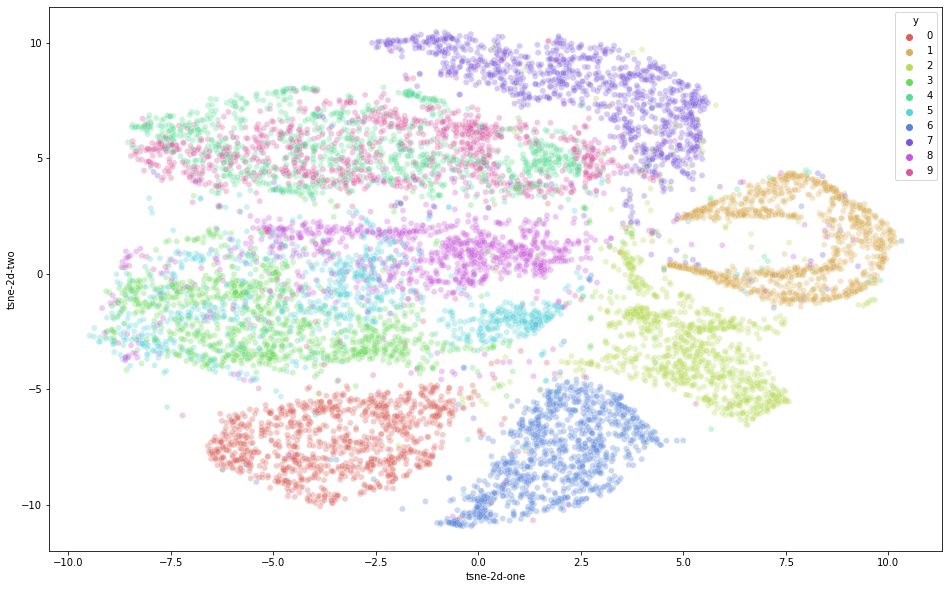

In [91]:
df_subset['tsne-2d-one'] = tsne_result[:,0]
df_subset['tsne-2d-two'] = tsne_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-2d-one', 
    y='tsne-2d-two', 
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)